In [27]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [37]:
dataset = pd.read_csv('/content/drive/MyDrive/Prodigy_ML_Task 1/X_train.csv')

In [38]:
# Separate features (X) and target variable (y) for training data

X_train = dataset[['GrLivArea', 'BedroomAbvGr', 'FullBath']]
y_train = dataset['SalePrice']

In [39]:
# Split the training data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [40]:
# Create and train the linear regression model

model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the validation set

y_val_pred = model.predict(X_val)
residuals = y_val - y_val_pred

In [43]:
# Evaluate the model on the validation set

mse = mean_squared_error(y_val, y_val_pred)
r2 = r2_score(y_val, y_val_pred)

print(f'Validation Mean Squared Error: {mse: 0.2f}')
print(f'Validation R-squared: {r2: 0.2f}')

Validation Mean Squared Error:  2806426667.25
Validation R-squared:  0.63


In [44]:
# Predict house price for a new data point

new_data_point = [[1200, 3, 1]]  # GrLivArea i.e.square footage, BedroomAbvGr, FullBath
predicted_price = model.predict(new_data_point)

print(f'Predicted Price: ${predicted_price[0]}')

Predicted Price: $662143290.684582


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [45]:
import matplotlib.pyplot as plt
import seaborn as sns

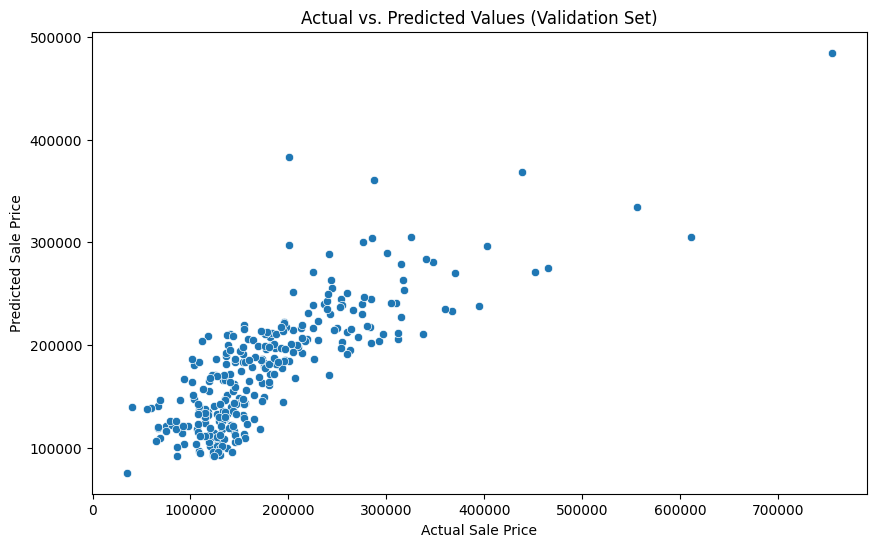

In [46]:
# Plotting Mean Squared Error

plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_val, y=y_val_pred)
plt.title('Actual vs. Predicted Values (Validation Set)')
plt.xlabel('Actual Sale Price')
plt.ylabel('Predicted Sale Price')
plt.show()

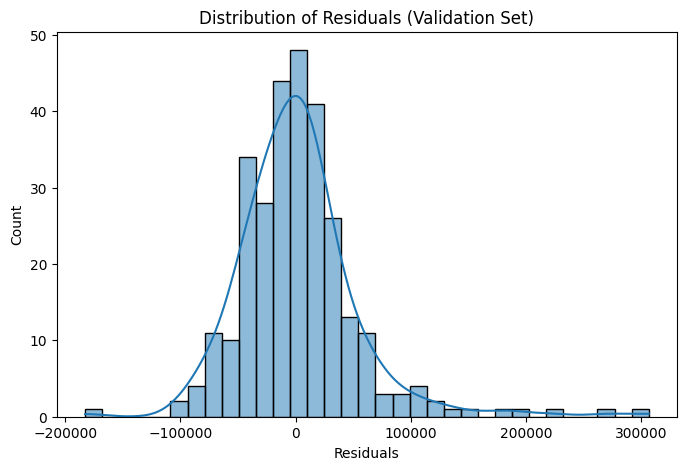

In [47]:
# Plotting R-squared

plt.figure(figsize=(8, 5))
sns.histplot(residuals, kde=True)
plt.title('Distribution of Residuals (Validation Set)')
plt.xlabel('Residuals')
plt.show()